In [21]:
import pandas as pd

# Load the CSV file with a different encoding to handle UnicodeDecodeError
file_path_csv = 'Superstore Dataset.csv'
orders_csv = pd.read_csv(file_path_csv, encoding='ISO-8859-1')

# Calculate the total sales for each product
product_sales = orders_csv.groupby('Product ID')['Sales'].sum()

# Sort the products by total sales in descending order
top_products_by_sales = product_sales.sort_values(ascending=False).head(7)

# Calculate the total profit for each product
product_profit = orders_csv.groupby('Product ID')['Profit'].sum()

# Sort the products by total profit in descending order
top_products_by_profit = product_profit.sort_values(ascending=False).head(7)

# Calculate the profit per sale for each product
orders_csv['Profit per Sale'] = orders_csv['Profit'] / orders_csv['Sales']
product_profit_per_sale = orders_csv.groupby('Product ID')['Profit per Sale'].mean()

# Sort the products by profit per sale in descending order
top_products_by_profit_per_sale = product_profit_per_sale.sort_values(ascending=False).head(7)

# Display the results as dataframes
top_products_by_sales_df = top_products_by_sales.reset_index().rename(columns={'Sales': 'Total Sales'})
top_products_by_profit_df = top_products_by_profit.reset_index().rename(columns={'Profit': 'Total Profit'})
top_products_by_profit_per_sale_df = top_products_by_profit_per_sale.reset_index().rename(columns={'Profit per Sale': 'Average Profit per Sale'})

# Print the results to verify sorting
print("Top 3 Products by Sales:")
print(top_products_by_sales_df)
print("\nTop 3 Products by Profit:")
print(top_products_by_profit_df)
print("\nTop 3 Products by Profit per Sale (sorted correctly):")
print(top_products_by_profit_per_sale_df)


C:\Users\kookh\AppData\Local\Temp\ipykernel_19280\2451212114.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_csv = pd.read_csv(file_path_csv, encoding='ISO-8859-1')


Top 3 Products by Sales:
        Product ID  Total Sales
0  TEC-CO-10004722  184799.4720
1  OFF-BI-10003527   98120.4280
2  FUR-CH-10002024   70869.0780
3  TEC-MA-10002412   67915.4400
4  OFF-BI-10000545   62476.4580
5  OFF-BI-10001359   60815.9220
6  FUR-BO-10004834   58549.9308

Top 3 Products by Profit:
        Product ID  Total Profit
0  TEC-CO-10004722    75599.7840
1  OFF-BI-10003527    30757.9580
2  TEC-CO-10001449    21287.6452
3  TEC-CO-10003763    16393.7658
4  TEC-AC-10002049    15102.0642
5  TEC-MA-10000045    13374.1440
6  TEC-MA-10001127    12284.9298

Top 3 Products by Profit per Sale (sorted correctly):
        Product ID  Average Profit per Sale
0  TEC-MA-10002927                     0.50
1  OFF-PA-10004734                     0.50
2  OFF-PA-10004082                     0.50
3  OFF-PA-10004092                     0.50
4  OFF-LA-10003498                     0.50
5  OFF-PA-10002499                     0.50
6  OFF-LA-10003388                     0.49


In [19]:
import pandas as pd

# Load the CSV file with a different encoding to handle UnicodeDecodeError
file_path_csv = 'Superstore Dataset.csv'
orders_csv = pd.read_csv(file_path_csv, encoding='ISO-8859-1')

# Convert 'Order Date' to datetime with dayfirst to handle European date format
orders_csv['Order Date'] = pd.to_datetime(orders_csv['Order Date'], dayfirst=True, errors='coerce')

# Display the first few rows to check the data
print(orders_csv.head())

# Filter the data for the specified products by sales
products_sales = ['TEC-CO-10004722', 'OFF-BI-10003527', 'FUR-CH-10002024']
sales_data = orders_csv[orders_csv['Product ID'].isin(products_sales)]

# Filter the data for the specified products by profit
products_profit = ['TEC-CO-10004722', 'OFF-BI-10003527', 'TEC-CO-10001449']
profit_data = orders_csv[orders_csv['Product ID'].isin(products_profit)]

# Aggregate sales data by product and month
sales_data_agg = sales_data.groupby([pd.Grouper(key='Order Date', freq='M'), 'Product ID'])['Sales'].sum().unstack().fillna(0)

# Aggregate profit data by product and month
profit_data_agg = profit_data.groupby([pd.Grouper(key='Order Date', freq='M'), 'Product ID'])['Profit'].sum().unstack().fillna(0)

# Display the aggregated sales data and profit data
print(sales_data_agg.head())
print(profit_data_agg.head())


   Row ID      Unnamed: 1 Order Date   Ship Date       Ship Mode Customer ID  \
0  #NAME?  US-2019-103800 2019-01-03  07/01/2019  Standard Class    DP-13000   
1  #NAME?  US-2019-112326 2019-01-04  08/01/2019  Standard Class    PO-19195   
2  #NAME?  US-2019-112326 2019-01-04  08/01/2019  Standard Class    PO-19195   
3  #NAME?  US-2019-112326 2019-01-04  08/01/2019  Standard Class    PO-19195   
4  #NAME?  US-2019-141817 2019-01-05  12/01/2019  Standard Class    MB-18085   

   Customer Name      Segment        Country          City  ... Postal Code  \
0  Darren Powers     Consumer  United States       Houston  ...       77095   
1  Phillina Ober  Home Office  United States    Naperville  ...       60540   
2  Phillina Ober  Home Office  United States    Naperville  ...       60540   
3  Phillina Ober  Home Office  United States    Naperville  ...       60540   
4     Mick Brown     Consumer  United States  Philadelphia  ...       19143   

    Region       Product ID         Category

C:\Users\kookh\AppData\Local\Temp\ipykernel_19280\3091048890.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_csv = pd.read_csv(file_path_csv, encoding='ISO-8859-1')


c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

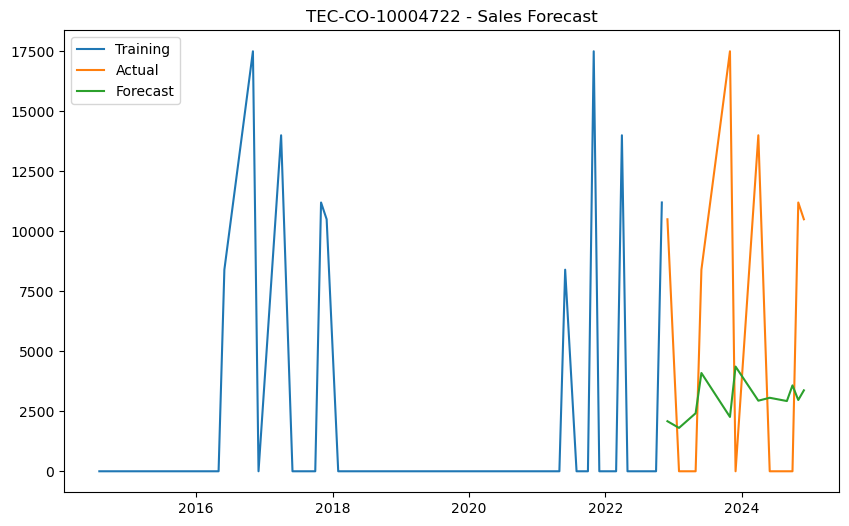

c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

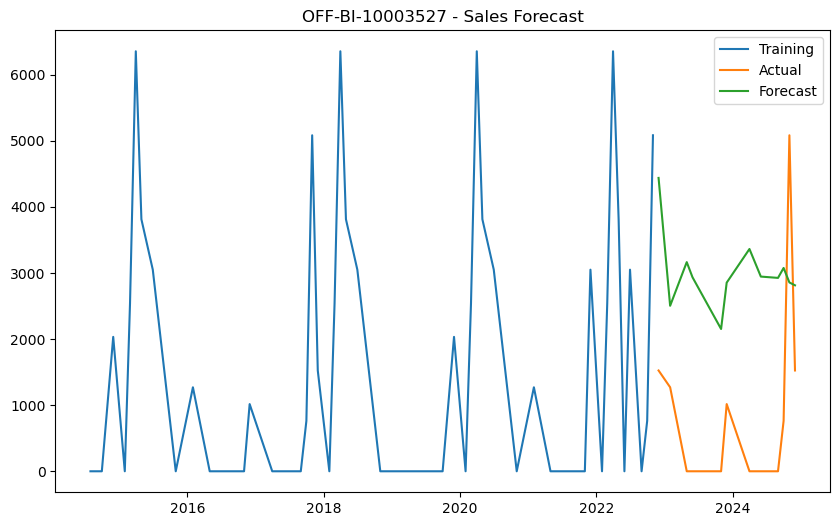

c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

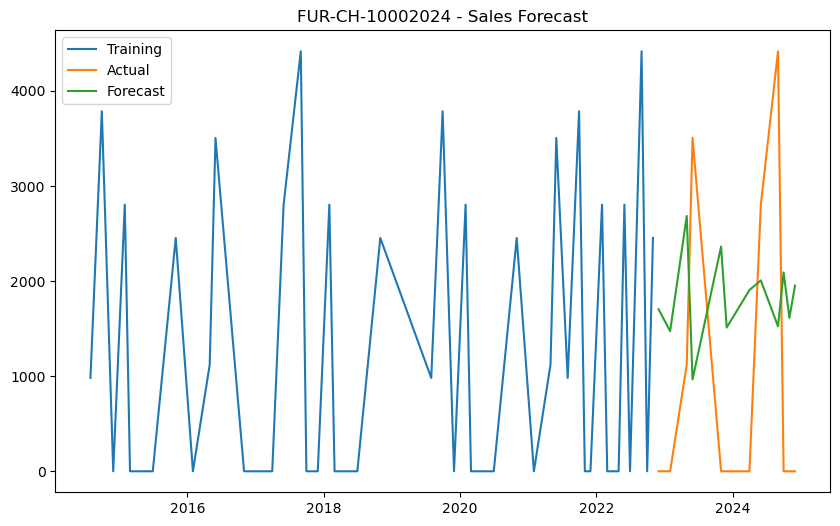

c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

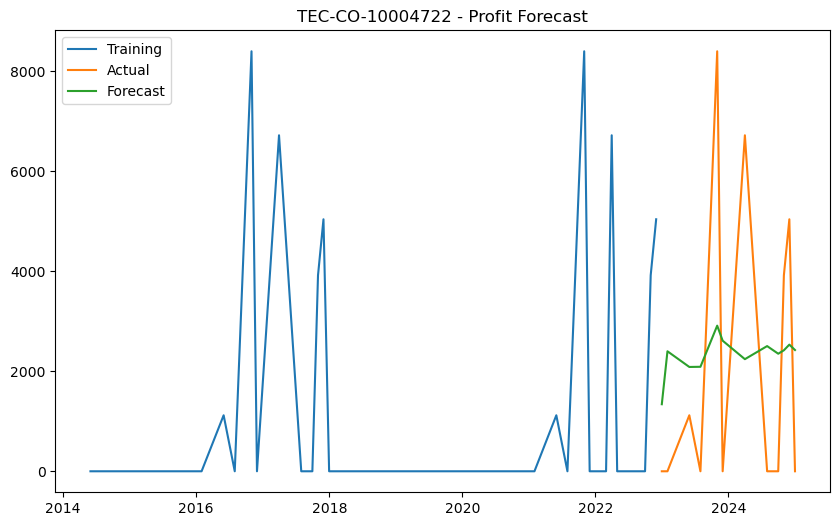

c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

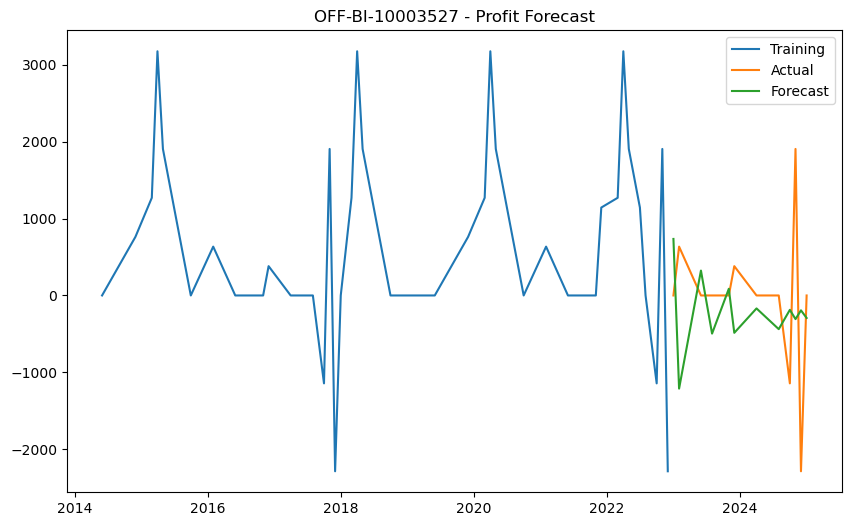

c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

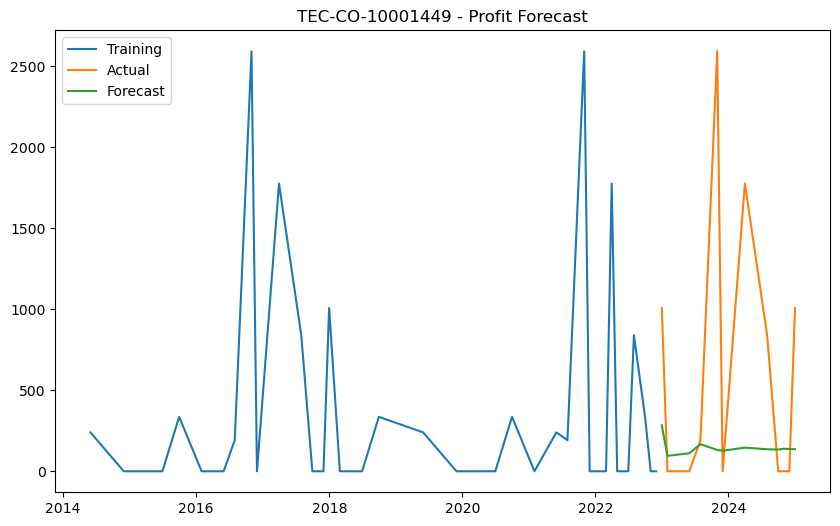

In [20]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Function to fit ARIMA model and plot forecasts
def fit_arima_and_forecast(data, product_id, column_name):
    y = data[product_id]
    
    # Train-test split
    train = y[:-12]
    test = y[-12:]
    
    # Fit ARIMA model
    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit()
    
    # Forecast
    forecast = model_fit.forecast(steps=12)
    forecast.index = test.index
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(train, label='Training')
    plt.plot(test, label='Actual')
    plt.plot(forecast, label='Forecast')
    plt.title(f'{product_id} - {column_name} Forecast')
    plt.legend()
    plt.show()

# Apply ARIMA model for each product by sales
for product_id in products_sales:
    fit_arima_and_forecast(sales_data_agg, product_id, 'Sales')

# Apply ARIMA model for each product by profit
for product_id in products_profit:
    fit_arima_and_forecast(profit_data_agg, product_id, 'Profit')


In [24]:
# Load the CSV file with a different encoding to handle UnicodeDecodeError
file_path_csv = 'Superstore Dataset.csv'
orders_csv = pd.read_csv(file_path_csv, encoding='ISO-8859-1')

# Convert 'Order Date' to datetime
orders_csv['Order Date'] = pd.to_datetime(orders_csv['Order Date'], dayfirst=True, errors='coerce')

# Filter the data for the specified sub-categories by sales
subcategories_sales = ['Copiers', 'Binders', 'Chairs']
sales_data = orders_csv[orders_csv['Sub-Category'].isin(subcategories_sales)]

# Filter the data for the specified sub-categories by profit
subcategories_profit = ['Copiers', 'Binders', 'Accessories']
profit_data = orders_csv[orders_csv['Sub-Category'].isin(subcategories_profit)]

# Aggregate sales data by sub-category and month
sales_data_agg = sales_data.groupby([pd.Grouper(key='Order Date', freq='M'), 'Sub-Category'])['Sales'].sum().unstack().fillna(0)

# Aggregate profit data by sub-category and month
profit_data_agg = profit_data.groupby([pd.Grouper(key='Order Date', freq='M'), 'Sub-Category'])['Profit'].sum().unstack().fillna(0)

# Display the aggregated sales data and profit data
print(sales_data_agg.head())
print(profit_data_agg.head())

C:\Users\kookh\AppData\Local\Temp\ipykernel_19280\1507671779.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_csv = pd.read_csv(file_path_csv, encoding='ISO-8859-1')


Sub-Category   Binders    Chairs  Copiers
Order Date                               
2014-01-31     814.508  4187.700     0.00
2014-02-28     339.262   190.458     0.00
2014-03-31    1525.675  5713.142     0.00
2014-04-30     985.752  3210.666     0.00
2014-05-31    4372.304  3675.109  2999.93
Sub-Category  Accessories    Binders   Copiers
Order Date                                    
2014-01-31       334.4240   190.7387    0.0000
2014-02-28       467.8996    61.5507    0.0000
2014-03-31       322.2499   381.3024    0.0000
2014-04-30       736.1707  -272.4077    0.0000
2014-05-31       151.7007  1197.6297  464.9885


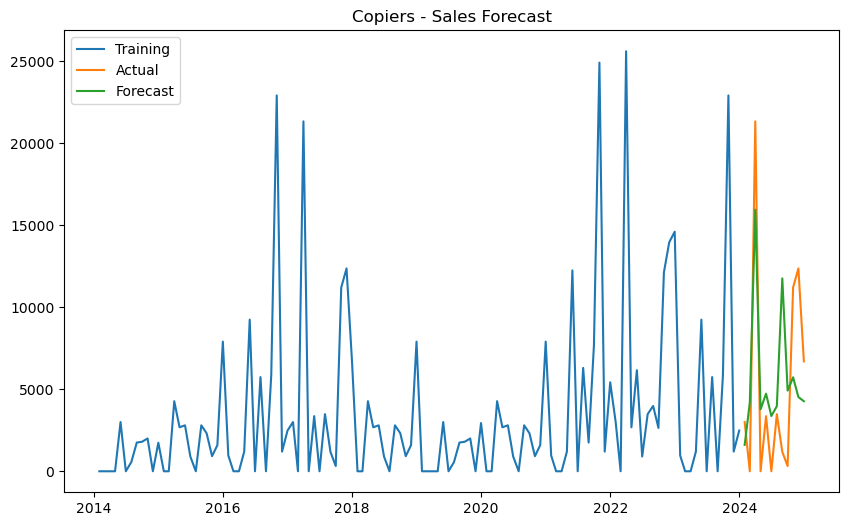

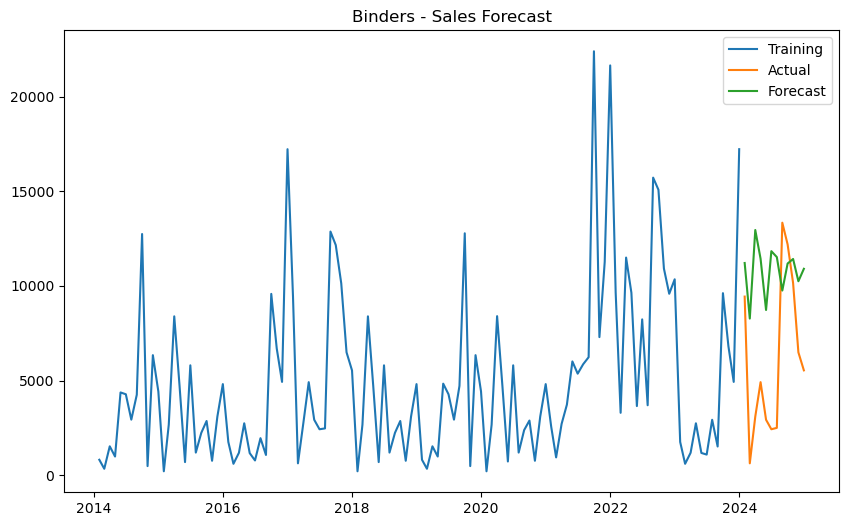

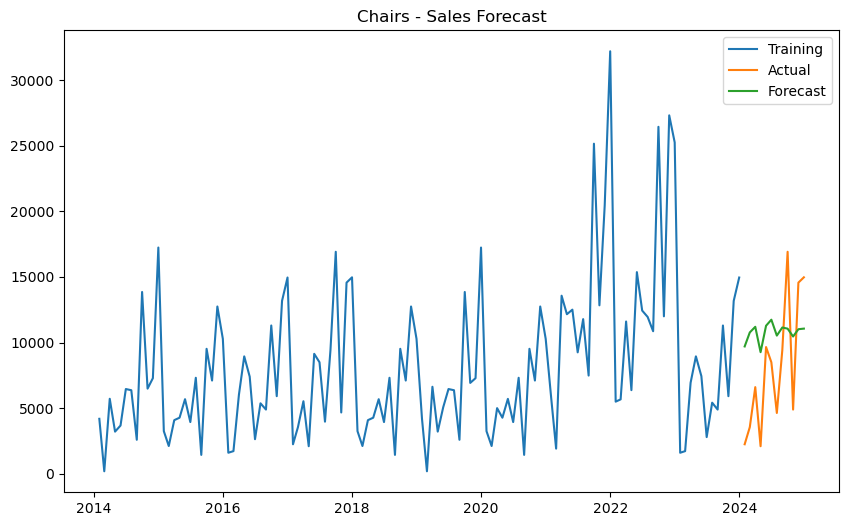

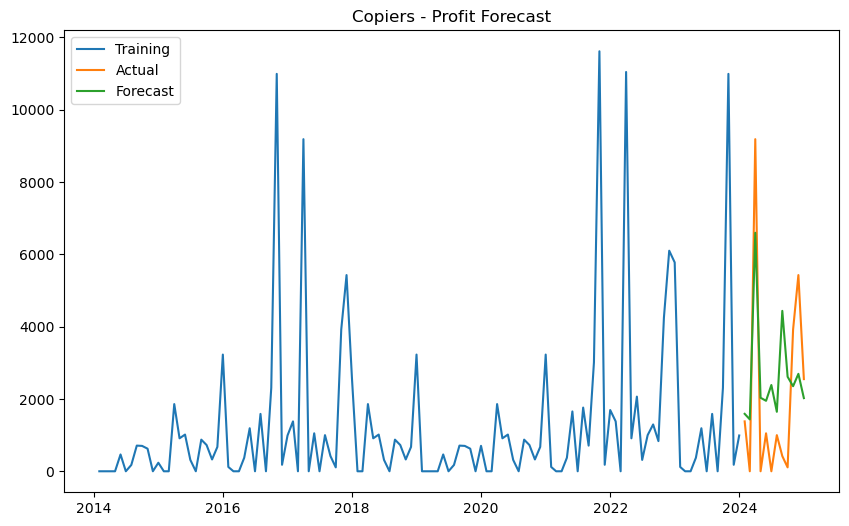

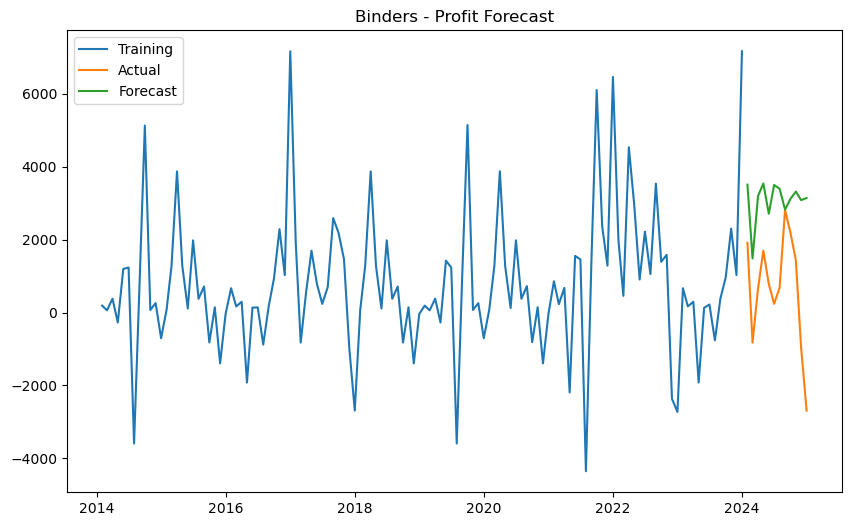

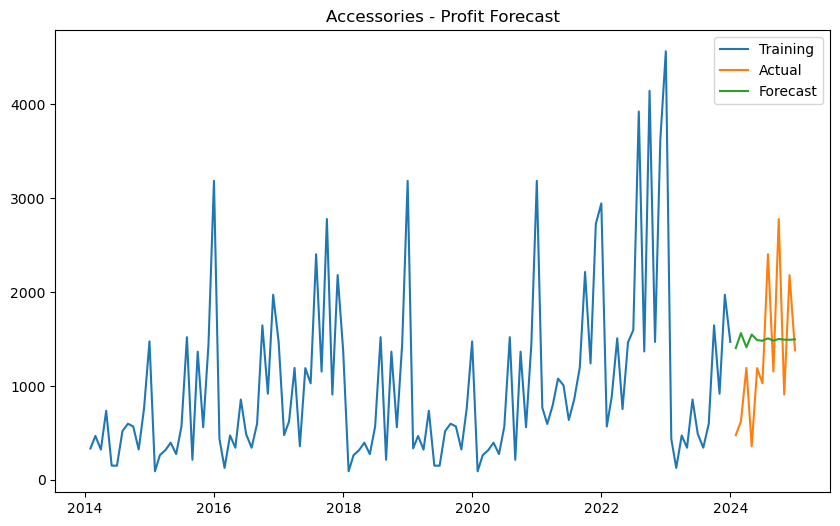

In [25]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Function to fit ARIMA model and plot forecasts
def fit_arima_and_forecast(data, sub_category, column_name):
    y = data[sub_category]
    
    # Train-test split
    train = y[:-12]
    test = y[-12:]
    
    # Fit ARIMA model
    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit()
    
    # Forecast
    forecast = model_fit.forecast(steps=12)
    forecast.index = test.index
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(train, label='Training')
    plt.plot(test, label='Actual')
    plt.plot(forecast, label='Forecast')
    plt.title(f'{sub_category} - {column_name} Forecast')
    plt.legend()
    plt.show()

# Apply ARIMA model for each sub-category by sales
for sub_category in subcategories_sales:
    fit_arima_and_forecast(sales_data_agg, sub_category, 'Sales')

# Apply ARIMA model for each sub-category by profit
for sub_category in subcategories_profit:
    fit_arima_and_forecast(profit_data_agg, sub_category, 'Profit')

In [37]:
import pandas as pd

# Load the CSV file
file_path_csv = 'Superstore Dataset.csv'
orders_csv = pd.read_csv(file_path_csv, encoding='ISO-8859-1')

# Convert 'Order Date' to datetime
orders_csv['Order Date'] = pd.to_datetime(orders_csv['Order Date'], dayfirst=True, errors='coerce')

# Fill missing values
orders_csv = orders_csv.fillna(0)

# Filter the data for the specified sub-categories by sales
subcategories_sales = ['Copiers', 'Binders', 'Chairs']
sales_data = orders_csv[orders_csv['Sub-Category'].isin(subcategories_sales)]

# Filter the data for the specified sub-categories by profit
subcategories_profit = ['Copiers', 'Binders', 'Accessories']
profit_data = orders_csv[orders_csv['Sub-Category'].isin(subcategories_profit)]

# Aggregate sales data by sub-category and week
sales_data_agg = sales_data.groupby([pd.Grouper(key='Order Date', freq='W-MON'), 'Sub-Category'])['Sales'].sum().unstack().fillna(0)

# Aggregate profit data by sub-category and week
profit_data_agg = profit_data.groupby([pd.Grouper(key='Order Date', freq='W-MON'), 'Sub-Category'])['Profit'].sum().unstack().fillna(0)

# Display the aggregated sales data and profit data
print(sales_data_agg.head())
print(profit_data_agg.head())



C:\Users\kookh\AppData\Local\Temp\ipykernel_19280\1248570219.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_csv = pd.read_csv(file_path_csv, encoding='ISO-8859-1')


Sub-Category  Binders   Chairs  Copiers
Order Date                             
2014-01-06    613.520  2573.82      0.0
2014-01-13     19.508   545.94      0.0
2014-01-20    166.872  1067.94      0.0
2014-01-27     10.680     0.00      0.0
2014-02-03    119.376     0.00      0.0
Sub-Category  Accessories   Binders  Copiers
Order Date                                  
2014-01-06          0.000  269.0040      0.0
2014-01-13        268.446  -18.0665      0.0
2014-01-20         65.978  -66.5441      0.0
2014-01-27          0.000    5.0196      0.0
2014-02-03        206.316   20.6631      0.0


In [38]:
import numpy as np

# Apply log transformation
sales_data_agg_log = np.log1p(sales_data_agg)
profit_data_agg_log = np.log1p(profit_data_agg)

# Differencing to make the series stationary
sales_data_agg_diff = sales_data_agg_log.diff().dropna()
profit_data_agg_diff = profit_data_agg_log.diff().dropna()

# Display the transformed data
print(sales_data_agg_diff.head())
print(profit_data_agg_diff.head())



Sub-Category   Binders    Chairs  Copiers
Order Date                               
2014-01-13   -3.400026 -1.549196      0.0
2014-01-20    2.102387  0.670084      0.0
2014-01-27   -2.665324 -6.974423      0.0
2014-02-03    2.332742  0.000000      0.0
2014-02-10   -0.089267  0.000000      0.0
Sub-Category  Accessories   Binders  Copiers
Order Date                                  
2014-02-03       5.334244  1.280590      0.0
2014-02-10      -1.410198 -0.017861      0.0
2014-02-17       1.325853  0.715348      0.0
2014-03-10       1.684647  0.006644      0.0
2014-03-17      -2.103323  0.116420      0.0


c:\Users\kookh\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

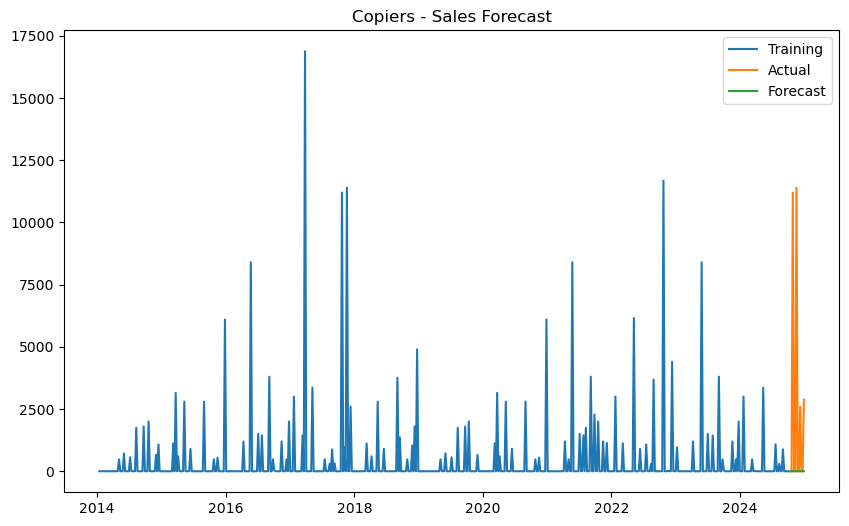

c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

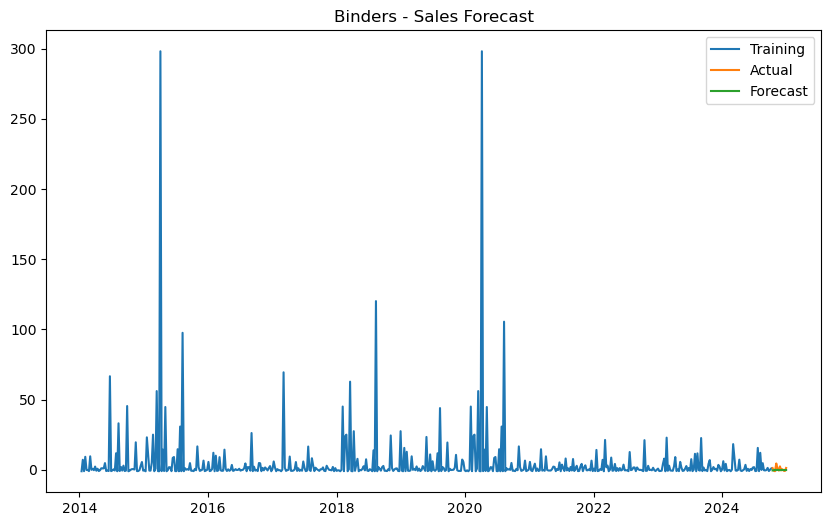

c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

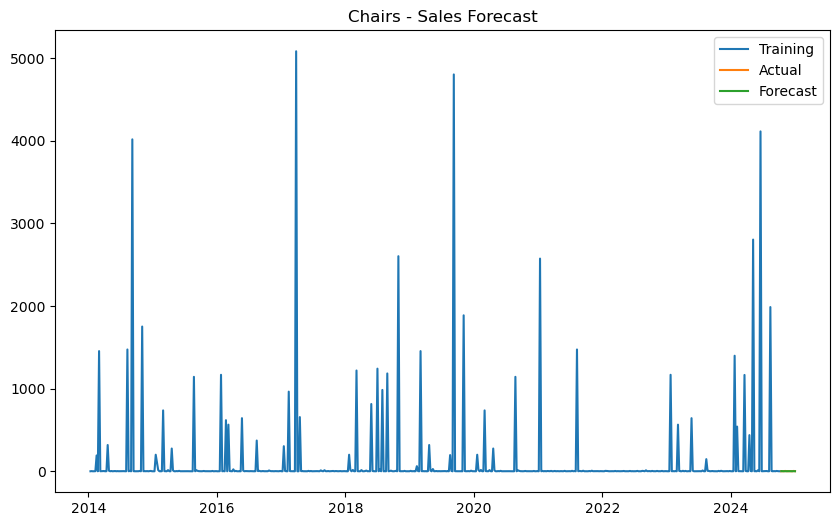

c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

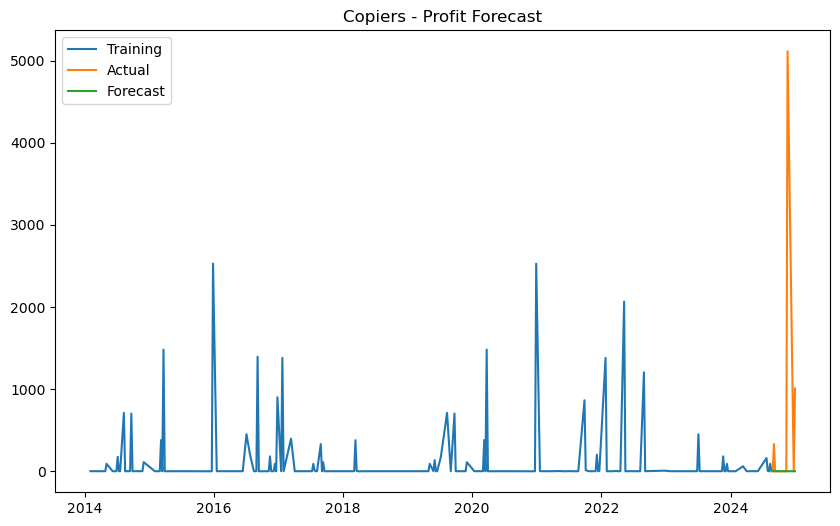

c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

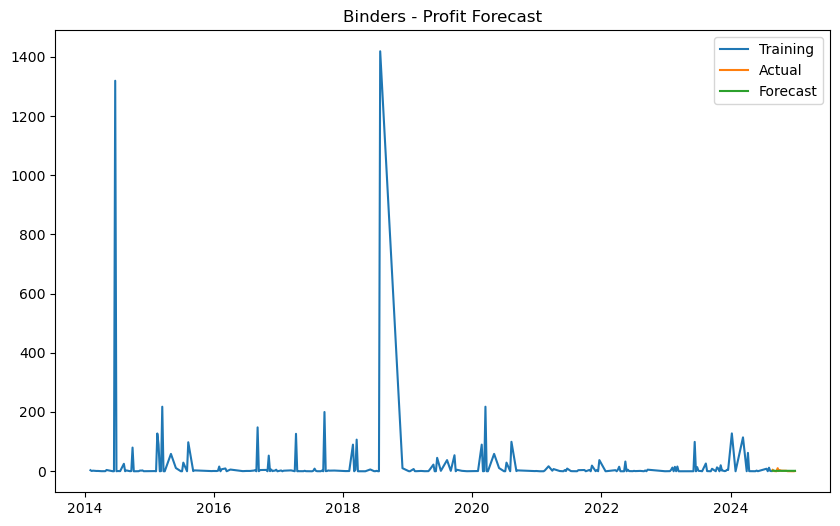

c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\kookh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

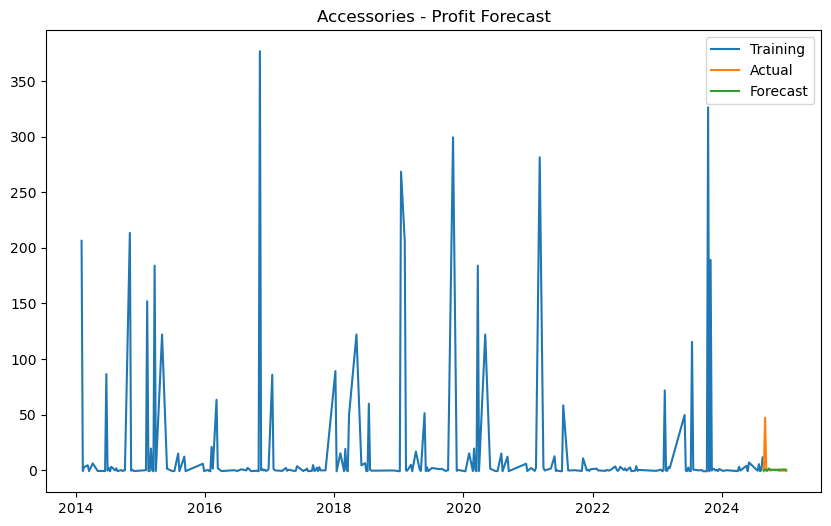

In [39]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Function to fit ARIMA model and plot forecasts
def fit_arima_and_forecast(data, sub_category, column_name):
    y = data[sub_category]
    
    # Train-test split
    train = y[:-12]
    test = y[-12:]
    
    # Fit ARIMA model
    model = ARIMA(train, order=(5,1,0))
    model_fit = model.fit()
    
    # Forecast
    forecast = model_fit.forecast(steps=12)
    forecast.index = test.index
    
    # Reverse the log transformation
    forecast = np.expm1(forecast)
    train = np.expm1(train)
    test = np.expm1(test)
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(train, label='Training')
    plt.plot(test, label='Actual')
    plt.plot(forecast, label='Forecast')
    plt.title(f'{sub_category} - {column_name} Forecast')
    plt.legend()
    plt.show()

# Apply ARIMA model for each sub-category by sales
for sub_category in subcategories_sales:
    fit_arima_and_forecast(sales_data_agg_diff, sub_category, 'Sales')

# Apply ARIMA model for each sub-category by profit
for sub_category in subcategories_profit:
    fit_arima_and_forecast(profit_data_agg_diff, sub_category, 'Profit')
